In [1]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import json

In [2]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2443,Zn,0.326963,-0.029010,0.341468,-922.041633,-922.070643,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1382.0, 0.0, 141.0, 0.0, 0.0, 1.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -3.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0,..."
4888,2444,Al,0.569094,0.049230,0.544478,-922.070643,-922.021413,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4889,2444,Al,0.519863,-0.049230,0.544478,-922.021413,-922.070643,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4890,2445,Al,0.552314,0.053045,0.525792,-922.070643,-922.017599,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [3]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,4892.0000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000
mean,1222.5000,0.499809,0.000000,0.499809,-894.243907,-894.243907
std,706.1715,0.206304,0.097687,0.200439,32.971650,32.971650
min,0.0000,-0.044152,-0.485086,-0.022076,-950.776122,-950.776122
25%,611.0000,0.382736,-0.056991,0.384449,-918.260210,-918.260210
50%,1222.5000,0.506474,0.000000,0.503933,-899.789770,-899.789770
75%,1834.0000,0.594659,0.056991,0.586361,-875.351591,-875.351591
max,2445.0000,4.607260,0.485086,4.547388,-801.581643,-801.581643


In [4]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

# df = df[556*2:2260]
df = df[2260:]
df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
2260,1130,Al,0.551454,-0.017951,0.560429,-914.514712,-914.532663,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21....","[-2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2261,1130,Al,0.569405,0.017951,0.560429,-914.532663,-914.514712,"[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[0.0, 0.5, 0.5, 0.5, 0.25, 0.25, 1.0, 0.0, 0.0...","[1356.0, 68.0, 82.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[2.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2262,1131,Zn,0.323667,-0.015743,0.331539,-914.514712,-914.530456,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21....","[0.0, 0.0, -3.0, 0.0, 2.0, 1.0, 0.0, 0.0, 3.0,...","[0.0, 0.0, 3.0, 0.0, -2.0, -1.0, 0.0, 0.0, -3...."
2263,1131,Zn,0.339410,0.015743,0.331539,-914.530456,-914.514712,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 1...","[1358.0, 67.0, 78.0, 3.0, 9.0, 9.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[0.0, 0.0, 3.0, 0.0, -2.0, -1.0, 0.0, 0.0, -3....","[0.0, 0.0, -3.0, 0.0, 2.0, 1.0, 0.0, 0.0, 3.0,..."
2265,1132,Al,1.076240,-0.210986,1.181733,-914.303726,-914.514712,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1354.0, 67.0, 85.0, 3.0, 7.0, 8.0, 690.0, 21....","[1358.0, 67.0, 81.0, 3.0, 7.0, 8.0, 690.0, 21....","[4.0, 0.0, -4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2443,Zn,0.326963,-0.029010,0.341468,-922.041633,-922.070643,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1382.0, 0.0, 141.0, 0.0, 0.0, 1.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -3.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0,..."
4888,2444,Al,0.569094,0.049230,0.544478,-922.070643,-922.021413,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4889,2444,Al,0.519863,-0.049230,0.544478,-922.021413,-922.070643,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4890,2445,Al,0.552314,0.053045,0.525792,-922.070643,-922.017599,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,1787.068216,0.505229,-0.000391,0.505424,-897.256454,-897.256845
std,379.650041,0.157480,0.088595,0.151855,30.483251,30.483192
min,1130.000000,-0.044152,-0.457422,-0.022076,-936.865565,-936.865565
25%,1458.750000,0.404389,-0.054659,0.409653,-919.153609,-919.153609
50%,1786.500000,0.517578,-0.000228,0.519094,-899.902109,-899.902462
75%,2115.000000,0.591566,0.054117,0.584575,-877.577095,-877.577095
max,2445.000000,1.090263,0.457422,1.181733,-817.131720,-817.131720


In [6]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [7]:
# np.linalg.norm(a-b)

In [8]:
df = df.sample(frac=1, random_state=0)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [9]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [10]:
x, y = np.stack(df_copy['bond_change_encode_forward']), np.array(df_copy['energy_difference'])


x_Al, y_Al = np.stack(df_copy[df_copy['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_copy[df_copy['migration_atom'] == 'Al']['e0'])
x_Mg, y_Mg = np.stack(df_copy[df_copy['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_copy[df_copy['migration_atom'] == 'Mg']['e0'])
x_Zn, y_Zn = np.stack(df_copy[df_copy['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_copy[df_copy['migration_atom'] == 'Zn']['e0'])

In [11]:
print(x.shape)
print(x_Al.shape)
print(x_Mg.shape)
print(x_Zn.shape)

(2015, 42)
(1210, 1521)
(399, 1521)
(406, 1521)


In [12]:
# plt.rcParams["font.family"] = "Times New Roman"
# from matplotlib import rc
# x_train, y_train = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)
# covariance = np.cov(x_train, rowvar=False)
# U, S, Uh = np.linalg.svd(covariance)

In [13]:
with open('kmc_parameters.json') as f:
    para = json.load(f)
    
theta = para['Bond']['theta']
mu_x_Al = para['Al']['mu_x']
mu_x_Mg = para['Mg']['mu_x']
mu_x_Zn = para['Zn']['mu_x']
mean_y_Al = para['Al']['mean_y']
mean_y_Mg = para['Mg']['mean_y']
mean_y_Zn = para['Zn']['mean_y']
theta_Al = para['Al']['theta']
theta_Mg = para['Mg']['theta']
theta_Zn = para['Zn']['theta']
U_Al = np.array(para['Al']['transform_matrix']).T
U_Mg = np.array(para['Mg']['transform_matrix']).T
U_Zn = np.array(para['Zn']['transform_matrix']).T

In [16]:
def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al)))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg)))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn)))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, (np.asarray(row['bond_change_encode_forward'])))

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               

df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)

df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']

In [17]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,predicted_e0,predicted_de,predicted_barrier
3629,1814,Al,0.498855,-0.101549,0.549629,-874.328248,-874.429797,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1209.0, 27.0, 244.0, 0.0, 9.0, 35.0, 608.0, 1...","[1211.0, 27.0, 242.0, 0.0, 9.0, 35.0, 610.0, 1...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 2.0, 0.0, -2.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, -2.0, 0.0, 2.0...",0.554896,-0.042893,0.533449
4881,2440,Al,0.568544,0.067005,0.535042,-922.077038,-922.010033,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.580199,0.040482,0.600440
3102,1551,Mg,0.395554,0.012334,0.389387,-915.665181,-915.652848,"[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[1356.0, 99.0, 51.0, 10.0, 8.0, 0.0, 687.0, 37...","[1356.0, 98.0, 51.0, 12.0, 7.0, 0.0, 687.0, 38...","[0.0, -1.0, 0.0, 2.0, -1.0, 0.0, 0.0, 1.0, 0.0...","[0.0, 1.0, 0.0, -2.0, 1.0, 0.0, 0.0, -1.0, 0.0...",0.356512,0.009668,0.361346
3738,1869,Mg,0.575457,0.076064,0.537426,-878.236586,-878.160522,"[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[0.75, 0.25, 0.0, 0.75, 0.25, 0.0, 0.0, 1.0, 0...","[1198.0, 239.0, 34.0, 39.0, 14.0, 0.0, 599.0, ...","[1198.0, 236.0, 34.0, 42.0, 14.0, 0.0, 599.0, ...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, -3.0, 0.0...",0.519300,0.131264,0.584932
3773,1886,Mg,0.519542,-0.045686,0.542385,-877.290087,-877.335772,"[0.5, 0.5, 0.0, 0.5, 0.25, 0.25, 0.0, 1.0, 0.0...","[0.5, 0.5, 0.0, 0.5, 0.25, 0.25, 0.0, 1.0, 0.0...","[1198.0, 214.0, 60.0, 31.0, 19.0, 2.0, 601.0, ...","[1198.0, 213.0, 60.0, 32.0, 19.0, 2.0, 601.0, ...","[0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0,...","[0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -2.0, 0.0...",0.566988,0.015707,0.574841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1996,Zn,0.244256,0.027362,0.230575,-872.276644,-872.249282,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1205.0, 32.0, 237.0, 1.0, 14.0, 35.0, 605.0, ...","[1205.0, 32.0, 239.0, 1.0, 12.0, 35.0, 605.0, ...","[0.0, 0.0, 2.0, 0.0, -2.0, 0.0, 0.0, 0.0, -1.0...","[0.0, 0.0, -2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0,...",0.330536,0.038457,0.349765
3025,1512,Mg,0.401275,-0.029414,0.415982,-919.585200,-919.614614,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 137.0, 9.0, 13.0, 3.0, 0.0, 692.0, 50...","[1362.0, 137.0, 9.0, 13.0, 3.0, 0.0, 692.0, 49...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.469962,-0.008708,0.465608
3097,1548,Mg,0.356708,-0.109758,0.411587,-918.033964,-918.143722,"[1.0, 0.0, 0.0, 0.5, 0.25, 0.25, 0.0, 1.0, 0.0...","[1.0, 0.0, 0.0, 0.5, 0.25, 0.25, 0.0, 1.0, 0.0...","[1362.0, 96.0, 52.0, 8.0, 6.0, 0.0, 692.0, 35....","[1362.0, 96.0, 52.0, 6.0, 8.0, 0.0, 692.0, 34....","[0.0, 0.0, 0.0, -2.0, 2.0, 0.0, 0.0, -1.0, 0.0...","[0.0, 0.0, 0.0, 2.0, -2.0, 0.0, 0.0, 1.0, 0.0,...",0.410938,-0.009281,0.406298
3915,1957,Al,0.582515,-0.050827,0.607929,-875.060838,-875.111665,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[1204.0, 87.0, 185.0, 2.0, 27.0, 19.0, 605.0, ...","[1205.0, 86.0, 185.0, 2.0, 27.0, 19.0, 605.0, ...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0...",0.654584,-0.017021,0.646074


rmse 0.061639550834854145 0.5157586061186054


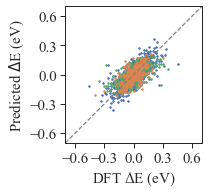

In [18]:
ele_list = ['Zn', 'Mg', 'Al']

sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })
lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse',
      np.sqrt(mean_squared_error(df['energy_difference'], df['predicted_de'])),
      r2_score(df['energy_difference'], df['predicted_de']))

rmse train 0.05085533660851531 0.8878030152394479


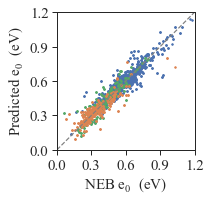

In [19]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('e0_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df['e0'], df['predicted_e0'])),
     r2_score(df['e0'], df['predicted_e0']))

rmse train 0.05922035039428656 0.8585323009418404


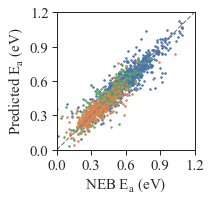

In [20]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df['migration_barriers'], df['predicted_barrier'])),
                 r2_score(df['migration_barriers'], df['predicted_barrier']))